In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Highincome = pd.read_csv('Cleaned Data/Highincome_DF.CSV')
UpperMidincome = pd.read_csv('Cleaned Data/UpperMidincome_DF.CSV')
Japan.set_index('Year', inplace = True) 
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 
Highincome.set_index('Year', inplace = True) 
UpperMidincome.set_index('Year', inplace = True) 

,GNI per Capita,14 Under,15 to 64,64 Above,Female(%),Total pop,Life expectancy at birth,"Fertility rate, total (births per woman)",Pop Growth,Work Population(%),Death rate,Birth rate,Trade balance,Gov Exp,GDP
Year,,,,,,,,,,,,,,,
1960,NaN,30.263900,64.115303,5.620797,50.776860,93216000.0,67.666098,2.001,NaN,55.969004,7.6,17.3,NaN,NaN,4.430734e+10
1961,NaN,29.409036,64.861841,5.729123,50.774954,94055000.0,68.310000,2.050,0.896034,54.173853,7.4,17.0,NaN,NaN,5.350862e+10
1962,610.0,28.478359,65.684948,5.836693,50.774908,94933000.0,68.594878,2.010,0.929166,52.241880,7.5,17.1,NaN,NaN,6.072302e+10
1963,700.0,27.520804,66.533759,5.945438,50.775146,95900000.0,69.658049,2.020,1.013460,50.299641,7.0,17.4,NaN,NaN,6.949813e+10
1964,810.0,26.630508,67.314153,6.055339,50.773674,96903000.0,70.132439,2.050,1.040450,48.557168,6.9,17.8,NaN,NaN,8.174901e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,38930.0,12.814390,60.076130,27.109479,51.152246,126972000.0,84.099756,1.430,-0.081874,66.455463,10.8,7.6,3.745783e+10,9.571640e+11,4.930837e+12
2018,41770.0,12.696849,59.726781,27.576370,51.159259,126811000.0,84.210976,1.420,-0.126880,67.429080,11.0,7.4,1.006129e+09,9.861860e+11,5.036892e+12
2019,42010.0,12.573031,59.424920,28.002049,51.166511,126633000.0,84.356341,1.360,-0.140465,68.279571,11.0,7.0,-1.480970e+10,1.020900e+12,5.148782e+12


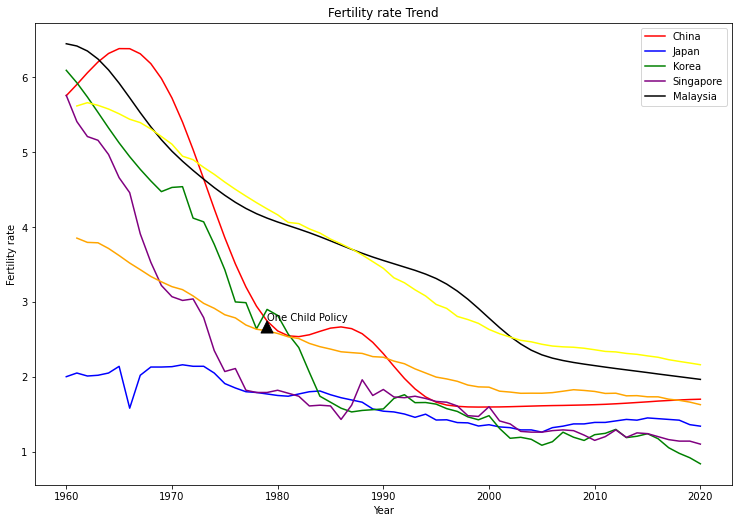

In [3]:
#Fertility rate between two countries and global average 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
ax.plot(China['Fertility rate, total (births per woman)'], 'red')
ax.annotate('One Child Policy', xy = (1979, 2.745), arrowprops=dict(facecolor='black'))
ax.plot(Japan['Fertility rate, total (births per woman)'], 'blue')
ax.plot(Korea['Fertility rate, total (births per woman)'], 'green')
ax.plot(Singapore['Fertility rate, total (births per woman)'], 'purple')
ax.plot(Malaysia['Fertility rate, total (births per woman)'], 'black')
ax.plot(Highincome['Fertility rate, total (births per woman)'], 'orange')
ax.plot(UpperMidincome['Fertility rate, total (births per woman)'], 'yellow')
ax.legend(['China', 'Japan', 'Korea', 'Singapore', 'Malaysia'])
ax.set_xlabel('Year')
ax.set_ylabel('Fertility rate')
ax.set_title('Fertility rate Trend')
Japan

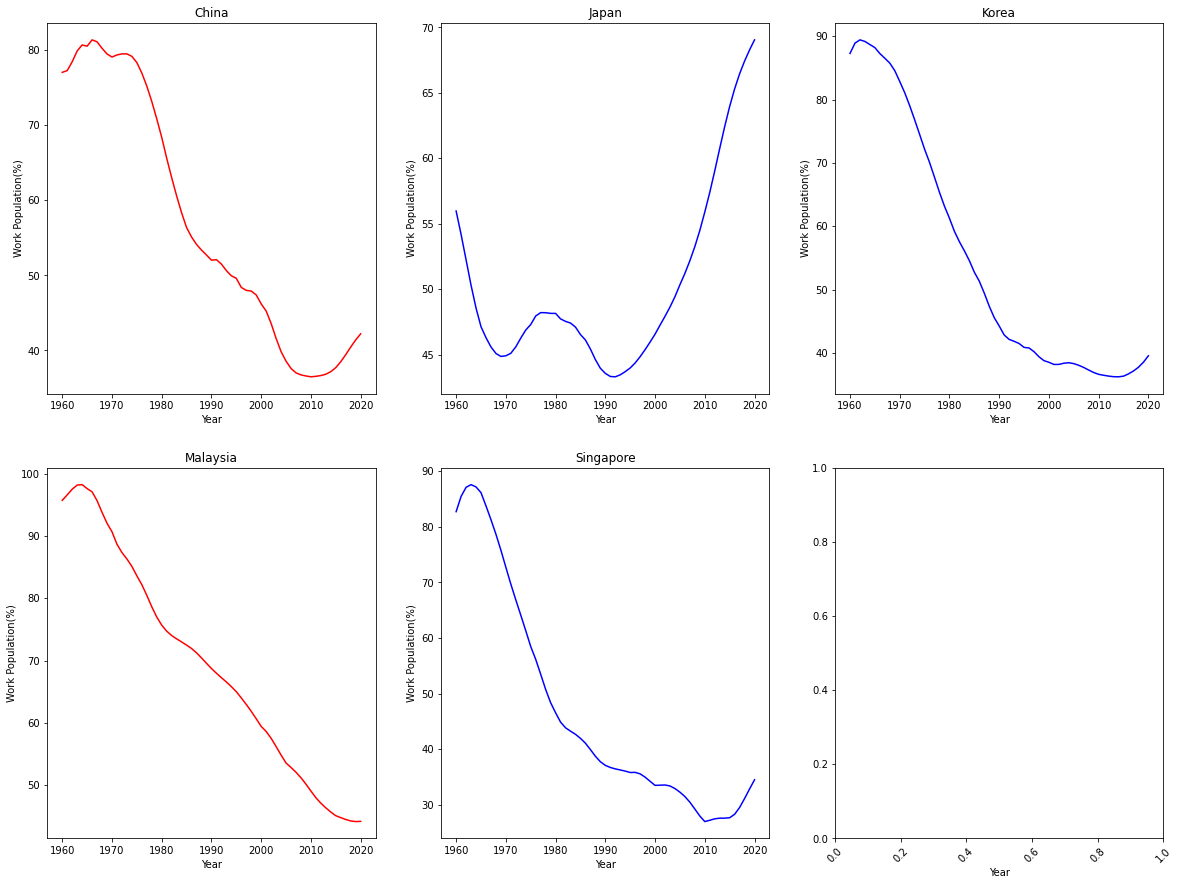

In [4]:
#Looking at change in work population
fig, ax = plt.subplots(2,3, figsize = (20,15))
sns.lineplot(ax = ax[0,0],data = China, x = 'Year', y = 'Work Population(%)', color = 'red').set(title  = 'China')
sns.lineplot(ax = ax[0,1],data = Japan, x = 'Year', y = 'Work Population(%)', color = 'Blue').set(title  = 'Japan')
sns.lineplot(ax = ax[0,2],data = Korea, x = 'Year', y = 'Work Population(%)', color = 'blue').set(title  = 'Korea')
sns.lineplot(ax = ax[1,0],data = Malaysia, x = 'Year', y = 'Work Population(%)', color = 'Red').set(title  = 'Malaysia')
sns.lineplot(ax = ax[1,1],data = Singapore, x = 'Year', y ='Work Population(%)', color = 'Blue').set(title  = 'Singapore' )
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

The ratio between Working population and non-working population have increased expotentially in Japan.
This would indicate Japan has a large working population. While other countries has similar ratio between each other, which is small compare to Japan. 
We can go back and use this data but this shows Japan is in an unique situation of itself.

Text(0.5, 1.0, '64 and Above population')

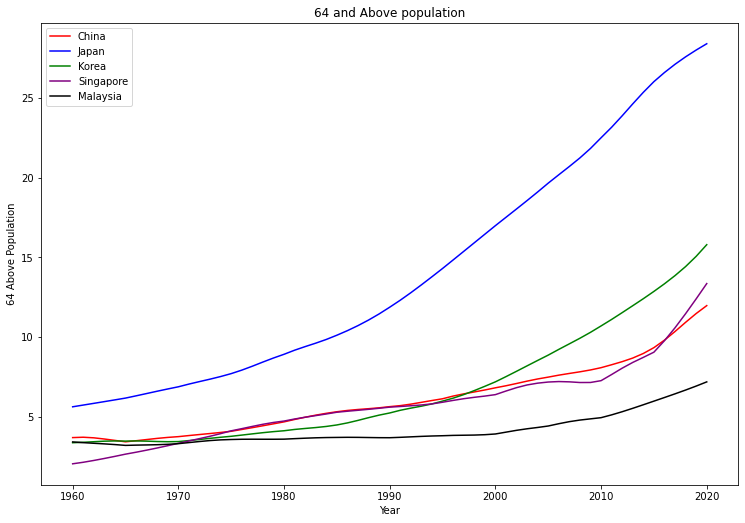

In [5]:
#Fertility rate between two countries and global average 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
ax.plot(China['64 Above'], 'red')
ax.plot(Japan['64 Above'], 'blue')
ax.plot(Korea['64 Above'], 'green')
ax.plot(Singapore['64 Above'], 'purple')
ax.plot(Malaysia['64 Above'], 'black')
ax.legend(['China', 'Japan', 'Korea', 'Singapore', 'Malaysia', 'Highincome','UpperMidincome'])
ax.set_xlabel('Year')
ax.set_ylabel('64 Above Population')
ax.set_title('64 and Above population')

Text(0.5, 1.0, 'Life expectancy at birth')

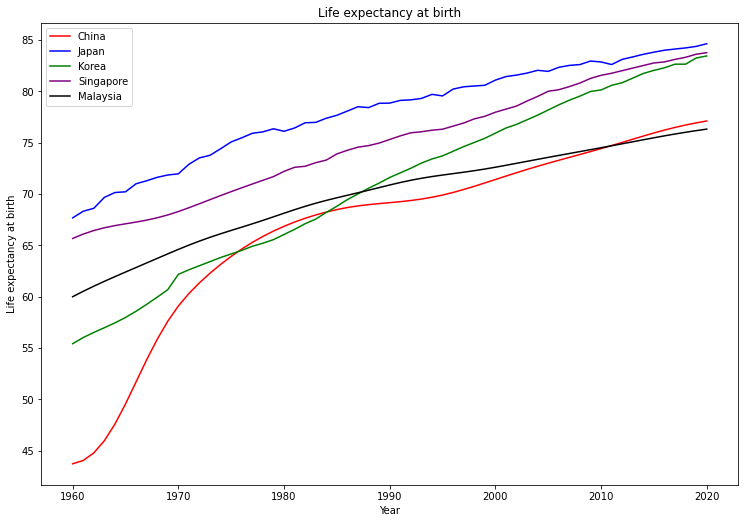

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
ax.plot(China['Life expectancy at birth'], 'red')
ax.plot(Japan['Life expectancy at birth'], 'blue')
ax.plot(Korea['Life expectancy at birth'], 'green')
ax.plot(Singapore['Life expectancy at birth'], 'purple')
ax.plot(Malaysia['Life expectancy at birth'], 'black')
ax.legend(['China', 'Japan', 'Korea', 'Singapore', 'Malaysia'])
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy at birth')
ax.set_title('Life expectancy at birth')

Text(0.5, 1.0, 'Female(%)')

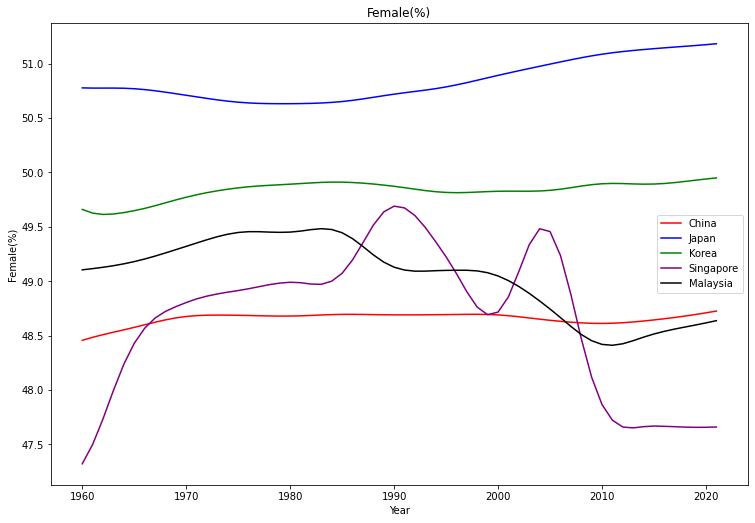

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
ax.plot(China['Female(%)'], 'red')
ax.plot(Japan['Female(%)'], 'blue')
ax.plot(Korea['Female(%)'], 'green')
ax.plot(Singapore['Female(%)'], 'purple')
ax.plot(Malaysia['Female(%)'], 'black')
ax.legend(['China', 'Japan', 'Korea', 'Singapore', 'Malaysia'])
ax.set_xlabel('Year')
ax.set_ylabel('Female(%)')
ax.set_title('Female(%)')

Text(0.5, 1.0, '14 Under')

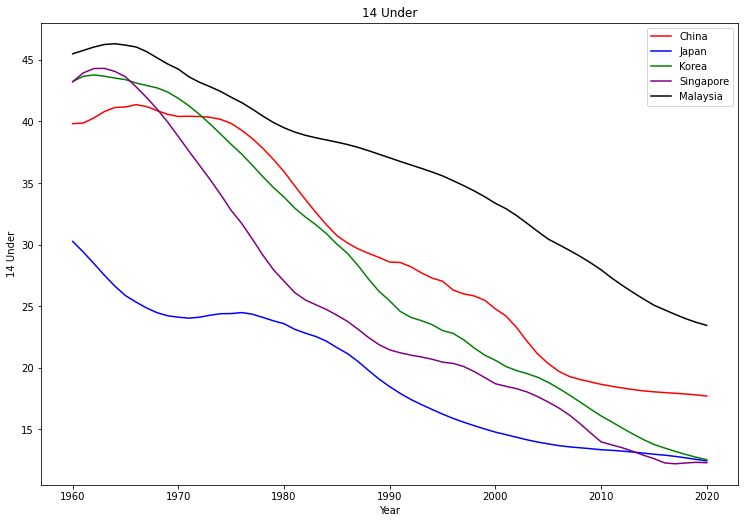

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
ax.plot(China['14 Under'], 'red')
ax.plot(Japan['14 Under'], 'blue')
ax.plot(Korea['14 Under'], 'green')
ax.plot(Singapore['14 Under'], 'purple')
ax.plot(Malaysia['14 Under'], 'black')
ax.legend(['China', 'Japan', 'Korea', 'Singapore', 'Malaysia'])
ax.set_xlabel('Year')
ax.set_ylabel('14 Under')
ax.set_title('14 Under')

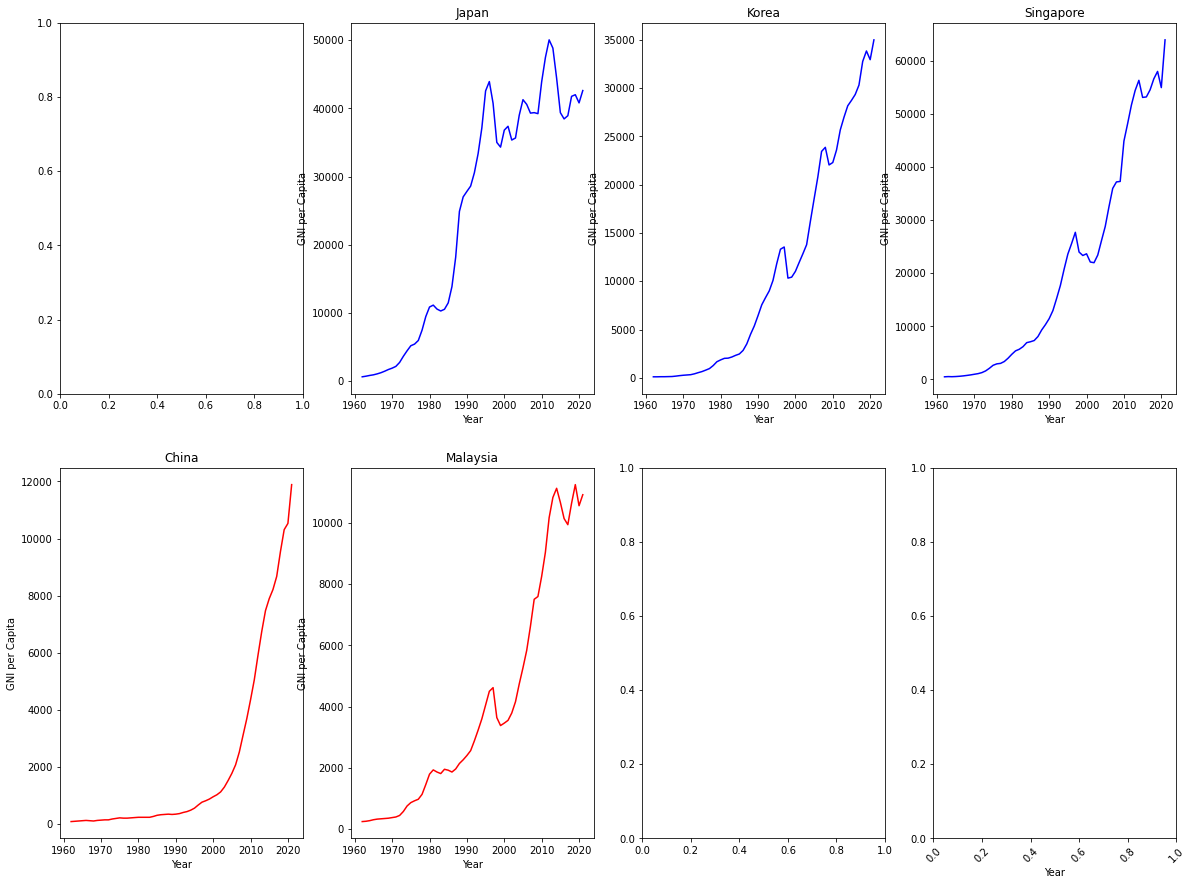

In [9]:
#Looking GNI. Blue are high income while red is Upper mid income
fig, ax = plt.subplots(2,4, figsize = (20,15))
sns.lineplot(ax = ax[0,1],data = Japan, x = 'Year', y = 'GNI per Capita', color = 'Blue').set(title  = 'Japan')
sns.lineplot(ax = ax[0,2],data = Korea, x = 'Year', y = 'GNI per Capita', color = 'Blue').set(title  = 'Korea')
sns.lineplot(ax = ax[0,3],data = Singapore, x = 'Year', y = 'GNI per Capita', color = 'Blue').set(title  = 'Singapore')
sns.lineplot(ax = ax[1,0],data = China, x = 'Year', y ='GNI per Capita', color = 'Red').set(title  = 'China' )
sns.lineplot(ax = ax[1,1],data = Malaysia, x = 'Year', y ='GNI per Capita', color = 'Red').set(title  = 'Malaysia' )
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'GDP Growth')

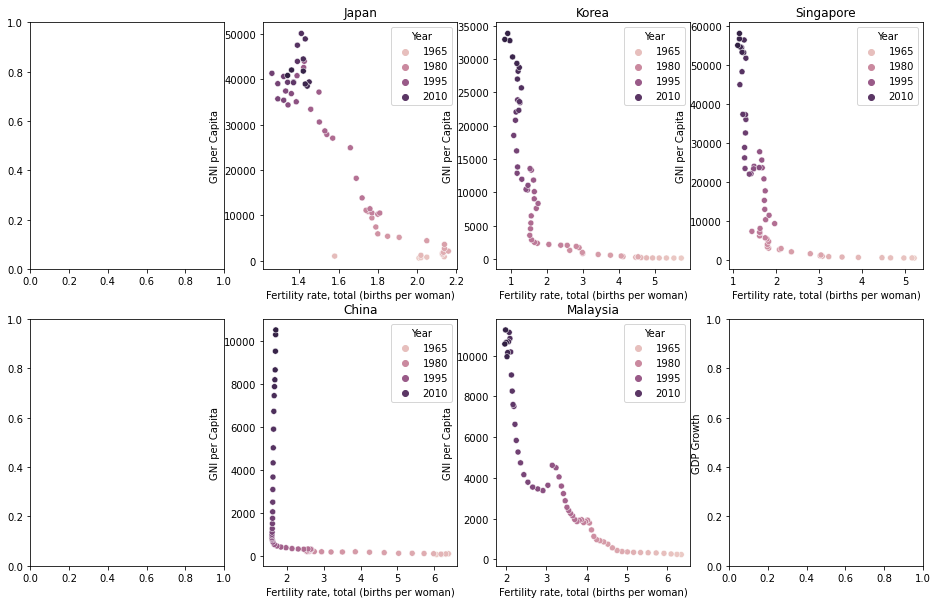

In [10]:
#Looking at relationship between Fertility rate and GNI
fig, ax = plt.subplots(2,4, figsize = (16, 10))
sns.scatterplot(ax = ax[0,1],y = 'GNI per Capita',  x= 'Fertility rate, total (births per woman)', data = Japan, hue ='Year').set(title= 'Japan')
sns.scatterplot(ax = ax[0,2],y = 'GNI per Capita',  x= 'Fertility rate, total (births per woman)', data = Korea, hue ='Year').set(title= 'Korea')
sns.scatterplot(ax = ax[0,3],y = 'GNI per Capita',  x= 'Fertility rate, total (births per woman)', data = Singapore, hue ='Year').set(title= 'Singapore')
sns.scatterplot(ax = ax[1,1],y = 'GNI per Capita',  x= 'Fertility rate, total (births per woman)', data = China, hue ='Year').set(title='China')
sns.scatterplot(ax = ax[1,2],y = 'GNI per Capita',  x= 'Fertility rate, total (births per woman)', data = Malaysia, hue ='Year').set(title='Malaysia')
plt.ylabel('GDP Growth')

The relationship between Fertility rate and GDP growth doesn't seem to have any strong correlation

Text(0, 0.5, 'GDP Growth')

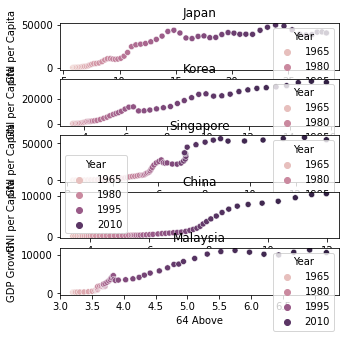

In [11]:
#Looking at the relationship between 64+ population and GDP Growth
fig, ax = plt.subplots(5,1, figsize = (5, 5))
sns.scatterplot(ax = ax[0],x = '64 Above',  y=  'GNI per Capita', data = Japan, hue ='Year').set(title= 'Japan')
sns.scatterplot(ax = ax[1],x = '64 Above',  y=  'GNI per Capita', data = Korea, hue ='Year').set(title= 'Korea')
sns.scatterplot(ax = ax[2],x = '64 Above',  y=  'GNI per Capita', data = Singapore, hue ='Year').set(title= 'Singapore')
sns.scatterplot(ax = ax[3],x = '64 Above',  y=  'GNI per Capita', data = China, hue ='Year').set(title='China')
sns.scatterplot(ax = ax[4],x = '64 Above',  y= 'GNI per Capita', data = Malaysia, hue ='Year').set(title='Malaysia')
plt.ylabel('GDP Growth')

GDP growth. One interesting thing is that for high income country, Japan, Korea, and Singapore, there seems to be correlation between GDP Growth decreasing with the increase in aging population. 

Similar trend can be seen with GDP per Capita Growth.

Text(0, 0.5, 'GNI per Capita')

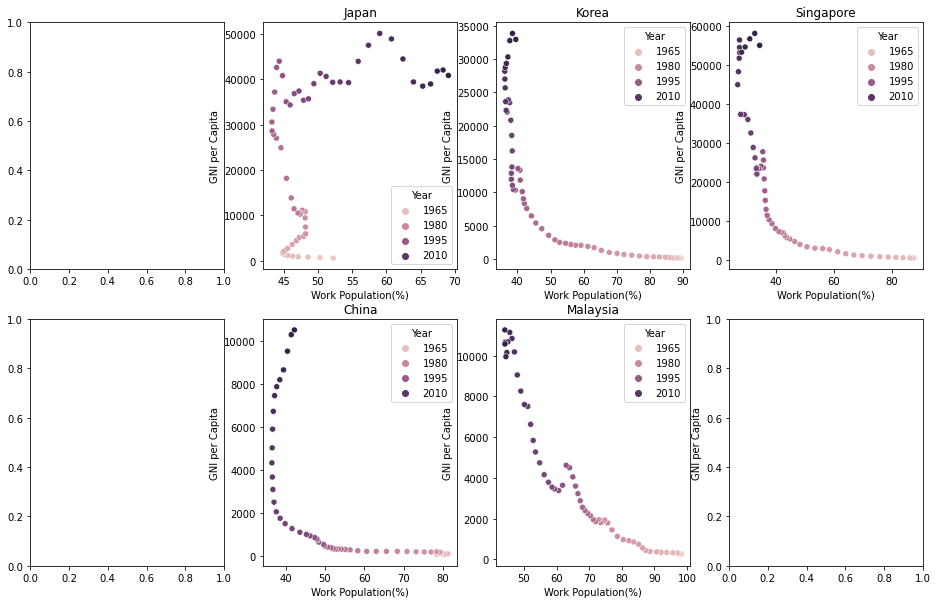

In [12]:
##Looking at the relationship between working population percentage and GNI
fig, ax = plt.subplots(2,4, figsize = (16, 10))
sns.scatterplot(ax = ax[0,1],x = 'Work Population(%)',  y=  'GNI per Capita', data = Japan, hue ='Year').set(title= 'Japan')
sns.scatterplot(ax = ax[0,2],x = 'Work Population(%)',  y=  'GNI per Capita', data = Korea, hue ='Year').set(title= 'Korea')
sns.scatterplot(ax = ax[0,3],x = 'Work Population(%)',  y=  'GNI per Capita', data = Singapore, hue ='Year').set(title= 'Singapore')
sns.scatterplot(ax = ax[1,1],x = 'Work Population(%)',  y=  'GNI per Capita', data = China, hue ='Year').set(title='China')
sns.scatterplot(ax = ax[1,2],x = 'Work Population(%)',  y= 'GNI per Capita', data = Malaysia, hue ='Year').set(title='Malaysia')
plt.ylabel('GNI per Capita')

Working age population does seem to have weak correlation.

[Text(0.5, 1.0, 'Singapore')]

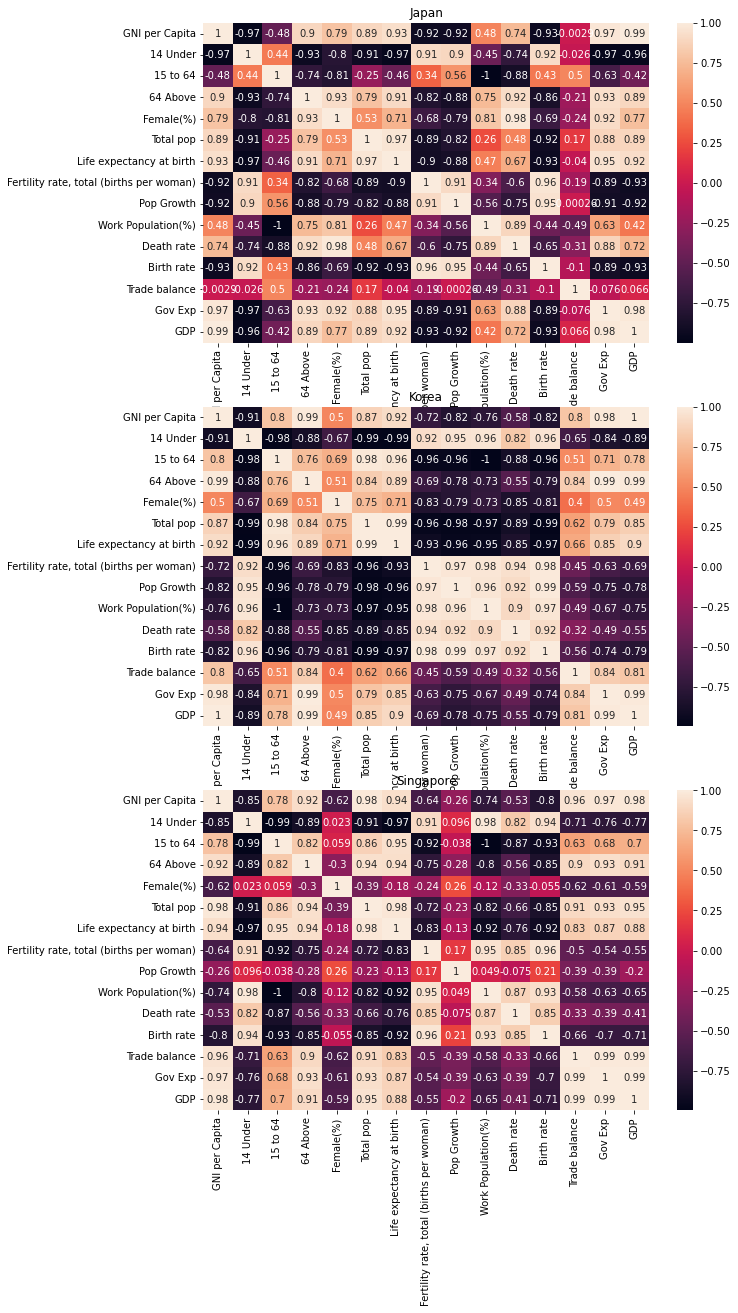

In [13]:
#Heatmap for developed countries
fig, ax = plt.subplots(3, 1, figsize = (10, 20))
sns.heatmap( Japan.corr(), annot = True, ax = ax[0]).set(title='Japan')

sns.heatmap( Korea.corr(), annot = True, ax = ax[1]).set(title='Korea')

sns.heatmap( Singapore.corr(), annot = True, ax = ax[2]).set(title='Singapore')


[Text(0.5, 1.0, 'Malaysia')]

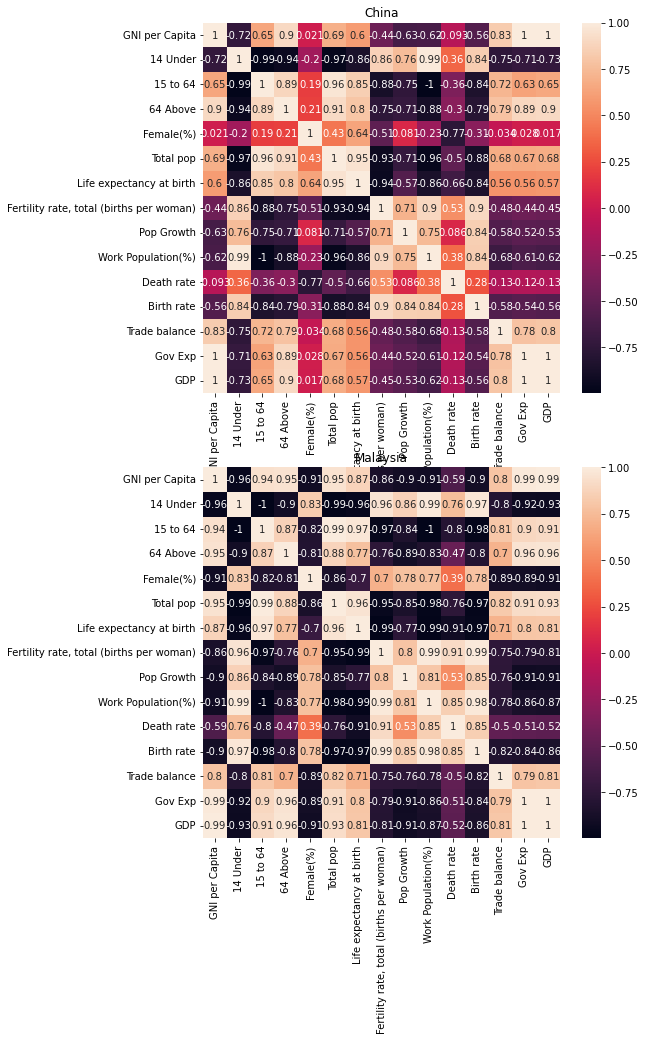

In [14]:
#Heatmap for developed countries
fig, ax = plt.subplots(2, 1, figsize = (8, 15))
sns.heatmap( China.corr(), annot = True, ax = ax[0]).set(title='China')
sns.heatmap( Malaysia.corr(), annot = True, ax = ax[1]).set(title='Malaysia')


[Text(0.5, 1.0, 'Singapore')]

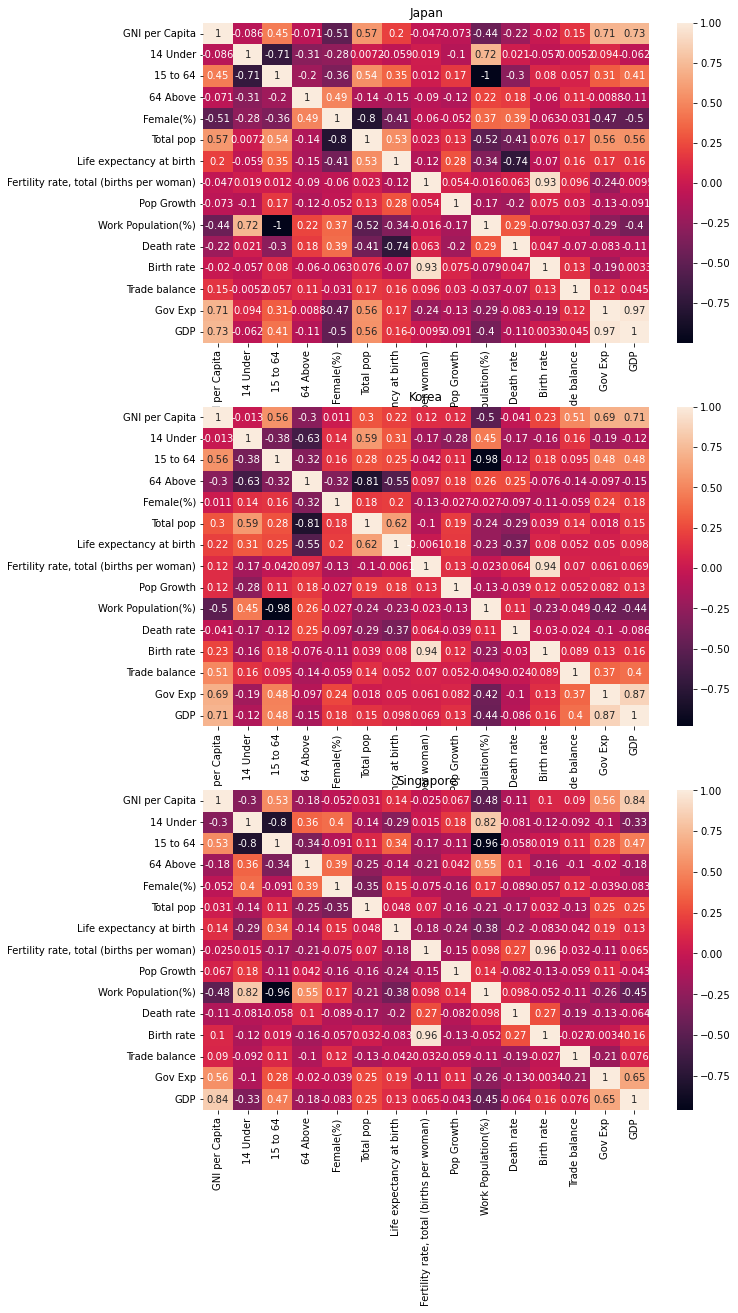

In [15]:
#Heatmap for developed countries
fig, ax = plt.subplots(3, 1, figsize = (10, 20))
sns.heatmap( Japan.pct_change().corr(), annot = True, ax = ax[0]).set(title='Japan')

sns.heatmap( Korea.pct_change().corr(), annot = True, ax = ax[1]).set(title='Korea')

sns.heatmap( Singapore.pct_change().corr(), annot = True, ax = ax[2]).set(title='Singapore')


[Text(0.5, 1.0, 'Malaysia')]

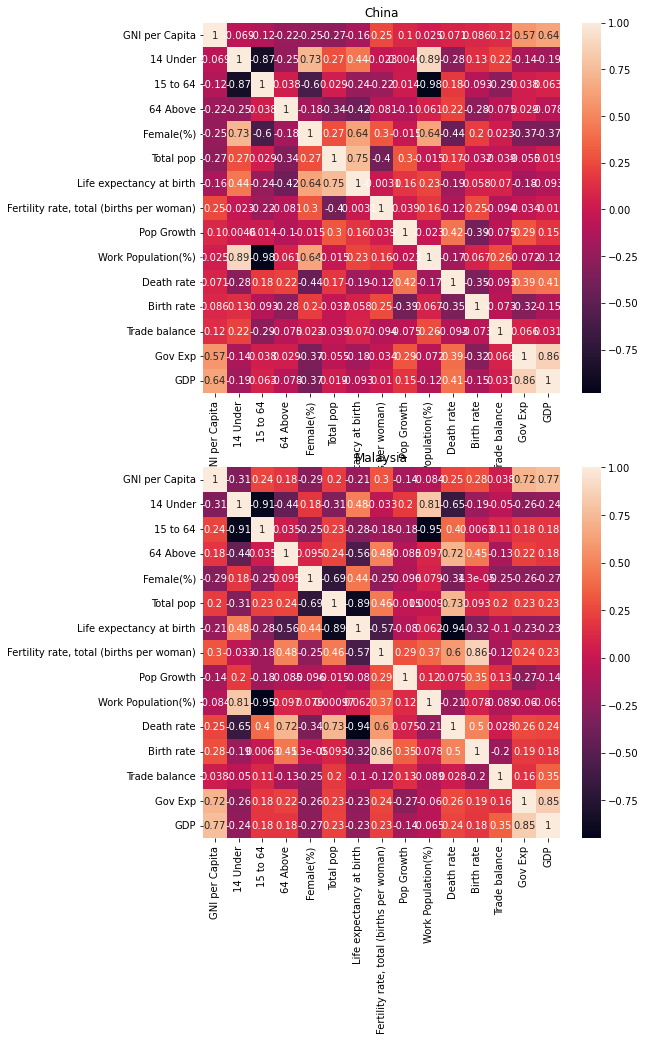

In [16]:
#Heatmap for developed countries
fig, ax = plt.subplots(2, 1, figsize = (8, 15))
sns.heatmap( China.pct_change().corr(), annot = True, ax = ax[0]).set(title='China')
sns.heatmap( Malaysia.diff().corr(), annot = True, ax = ax[1]).set(title='Malaysia')

[Text(0.5, 1.0, 'China')]

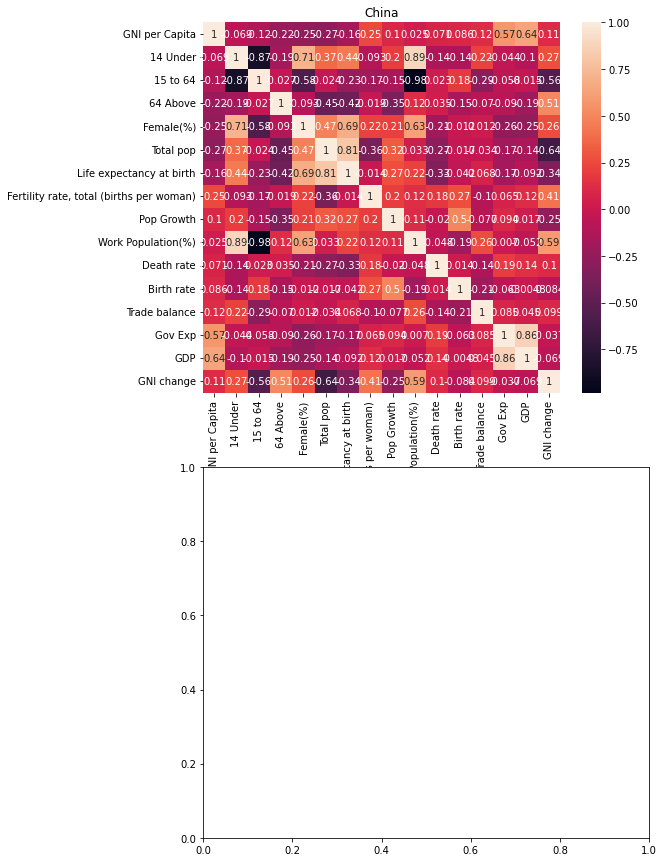

In [17]:
China_change = China.pct_change().dropna()
China_change['GNI change'] = China['GNI per Capita']
fig, ax = plt.subplots(2, 1, figsize = (8, 15))

sns.heatmap( China_change.corr(), annot = True, ax = ax[0]).set(title='China')

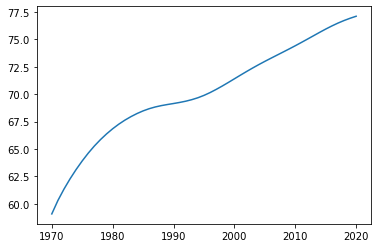

In [18]:
plt.plot(China[10:]['Life expectancy at birth'])

In [19]:
result1 = adfuller(China['Life expectancy at birth'])
result2 = adfuller(Japan['Life expectancy at birth'])
result1

(nan,
 nan,
 0,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 nan)

In [20]:
adfuller(China['Female(%)'])

(-3.5740006123176693,
 0.0062779817716654565,
 11,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 -707.8384697112825)

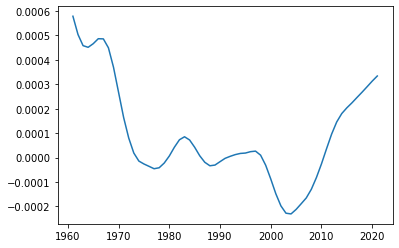

In [21]:
plt.plot(China['Female(%)'].pct_change())

In [29]:
x = China['GDP'].pct_change().dropna()
adfuller(x)

(-5.681772285799534,
 8.454114892234816e-07,
 0,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 -87.02640157892375)

In [23]:
x = China['15 to 64'].pct_change().dropna()
adfuller(x)

(-2.6194050733689274,
 0.08905258868842708,
 9,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 -456.8670684973629)

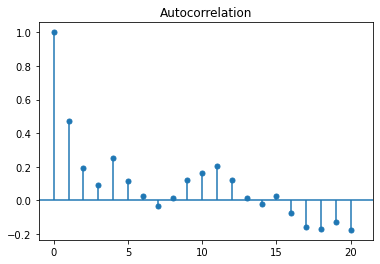

In [25]:
plot_acf(China['GNI per Capita'].pct_change().dropna(), alpha=1, lags=20)
plt.show()

In [26]:
China.dropna(inplace = True)
potential = China.columns
stationary_data = []
for i in potential:
    if adfuller(China[i])[1]<.05:
        stationary_data.append(i)
    else:
        pass

stationary_data

['Female(%)', 'Fertility rate, total (births per woman)', 'Birth rate']